<a href="https://colab.research.google.com/github/Iamsdt/UdacityPyTorch/blob/master/src/notebook/working/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

import torch

tcmalloc: large alloc 1073750016 bytes == 0x58fc6000 @  0x7f6a93bb22a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [2]:
# Load data
!wget -cq https://github.com/udacity/pytorch_challenge/raw/master/cat_to_name.json

!wget -cq https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip

!unzip -qq flower_data.zip

print("Data loaded")

Data loaded


In [1]:
# Load train class
!wget -c https://raw.githubusercontent.com/Iamsdt/UdacityPyTorch/master/src/notebook/Train.py

import Train

--2018-12-26 15:06:51--  https://raw.githubusercontent.com/Iamsdt/UdacityPyTorch/master/src/notebook/Train.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [2]:
import Train

# create train and test loader
data_dir = 'flower_data'

from torchvision import datasets, transforms

# number of subprocesses to use for data loading
num_workers = 4
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to torch.FloatTensor
transform_train = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

transform_valid = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

# ceate data loader
train_loader, valid_loader, test_loader = Train.prepare_loader(data_dir,transform_train,transform_valid,test_transforms)

Train size:6552
Valid size:6552
Test size:818


In [3]:
from torchvision import models
# load a pretrained model
model = models.densenet161(pretrained = True)

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [4]:
from torch import nn
print(model.classifier)
#num_ftrs = model.classifier.in_features
#print(num_ftrs)
#model.classifier = nn.Linear(num_ftrs, 102)
#print(model.classifier)

Linear(in_features=2208, out_features=1000, bias=True)


In [5]:
from collections import OrderedDict
from torch import nn

# create a simple classifier
classifier = nn.Sequential(OrderedDict([
                ('fc1', nn.Linear(2208, 500)),
                #('fc2', nn.Linear(2208, 1024)),
                #('fc3', nn.Linear(2208, 1024)),
                #('fc4', nn.Linear(2208, 1024)),
                ('relu', nn.ReLU()),
                ('dropout',nn.Dropout(p=0.2)),
                #('fc5', nn.Linear(512, 400)),
                ('fc2', nn.Linear(500, 102)),
                ('output', nn.LogSoftmax(dim=1))
                ]))

# replace the classifer
model.classifier = classifier
# check the classifier
print(model.classifier)

Sequential(
  (fc1): Linear(in_features=2208, out_features=500, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2)
  (fc2): Linear(in_features=500, out_features=102, bias=True)
  (output): LogSoftmax()
)


In [0]:
import torch
from torch import optim
from torch.optim import lr_scheduler
# set cretrion and optimizer
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)

#optimizer = optim.Adadelta(model.parameters(), lr=0.01)
scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.01)

#move tensor to default device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [0]:
# Freeze the parameter
model = Train.freeze_parameters(model)
#for _, param in model.named_parameters():
#  param.requires_grad = False
print("Parameter Freezed")

In [13]:
!pip uninstall -y Pillow
!pip install Pillow==5.3.0

Uninstalling Pillow-5.3.0:
  Successfully uninstalled Pillow-5.3.0
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
model_save_name = 'classifier.pt'
path = F"/content/gdrive/My Drive/model/{model_save_name}" 
model.load_state_dict(torch.load(path))

In [8]:
# Train model
epochs = 10
model, train_loss,valid_loss = Train.train_model(
    model,train_loader,valid_loader, epochs, optimizer,scheduler, criterion)

Epoch: 1/10
		Going for validation
	Train loss:2.745039.. 	Valid Loss:0.606288.. 	Accuracy: 28.3969
	Validation loss decreased (inf --> 0.606288).  Saving model ...
	Epoch:1 completed in 3m 57s
Epoch: 2/10
		Going for validation
	Train loss:2.496569.. 	Valid Loss:0.530681.. 	Accuracy: 36.9466
	Validation loss decreased (0.606288 --> 0.530681).  Saving model ...
	Epoch:2 completed in 7m 58s
Epoch: 3/10
		Going for validation
	Train loss:2.553105.. 	Valid Loss:0.504060.. 	Accuracy: 34.4275
	Validation loss decreased (0.530681 --> 0.504060).  Saving model ...
	Epoch:3 completed in 11m 58s
Epoch: 4/10
		Going for validation
	Train loss:2.362152.. 	Valid Loss:0.443759.. 	Accuracy: 42.9771
	Validation loss decreased (0.504060 --> 0.443759).  Saving model ...
	Epoch:4 completed in 15m 58s
Epoch: 5/10
		Going for validation
	Train loss:2.177315.. 	Valid Loss:0.412235.. 	Accuracy: 46.7939
	Validation loss decreased (0.443759 --> 0.412235).  Saving model ...
	Epoch:5 completed in 19m 58s
Epoch: 

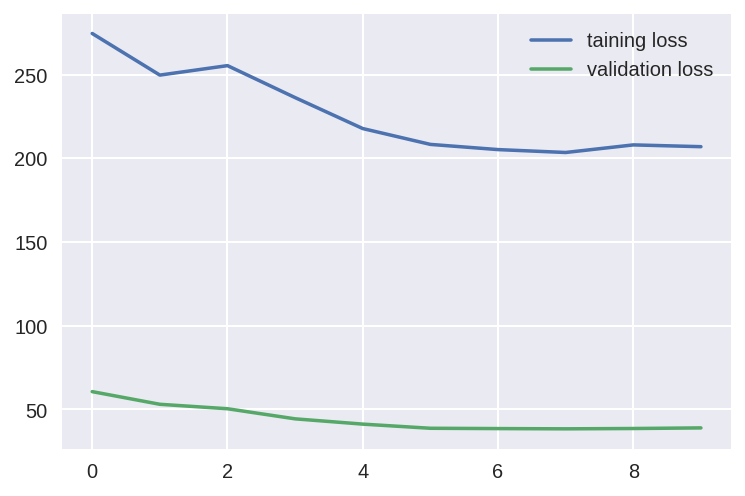

In [9]:
#Check for overfitting

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_loss, label = "taining loss")
plt.plot(valid_loss, label = "validation loss")
plt.legend(frameon = False)

In [14]:
!ls /content/gdrive/My Drive/model

ls: cannot access '/content/gdrive/My': No such file or directory
ls: cannot access 'Drive/model': No such file or directory


In [0]:
# type day_time_pm_percentage
model_save_name = 'flower4_26_10p_49.pt'
path = F"/content/gdrive/My Drive/model/{model_save_name}" 
torch.save(model.state_dict(), path)

In [0]:
# Unfreeze the parameter
#model = Train.unfreeze(model)
for _, param in model.named_parameters():
  param.requires_grad = True

print("Parameter unfreezed")

In [0]:
# Test accuracy top 10 classs
Train.calculate_top_accuracy(model, test_loader, criterion)

Test Loss: 0.196509

Test Accuracy of     0:  0% ( 0/ 2)
Test Accuracy of     1:  0% ( 0/ 1)
Test Accuracy of     2:  0% ( 0/ 3)
Test Accuracy of     3:  0% ( 0/ 4)
Test Accuracy of     4:  0% ( 0/ 1)
Test Accuracy of     5:  0% ( 0/ 6)
Test Accuracy of     6:  0% ( 0/ 3)
Test Accuracy of     7:  0% ( 0/ 4)
Test Accuracy of     8: N/A (no training examples)
Test Accuracy of     9:  0% ( 0/ 4)

Test Accuracy (Overall):  7% (30/410)


In [0]:
# Test total accuracy
Train.calc_accuracy(model,testset_path="flower_data/valid")

In [0]:
# Test with google data set
Train.calc_accuracy(model,use_google_testset=True)

In [0]:
cat_to_name = Train.get_cat_name()

In [0]:
# visualize data